In [1]:
import os
import torch

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from got10k.datasets import GOT10k
from trackers import TrackerSiamFC, SiamFC, DSSiam

from PIL import Image

In [36]:
# Init sequence of GOT-10k dataset.
seq_nums = [2996]

dataset = GOT10k(os.path.expanduser('F:/GOT-10k'), subset='train', return_meta=False)
dataset = [dataset[s] for s in seq_nums]

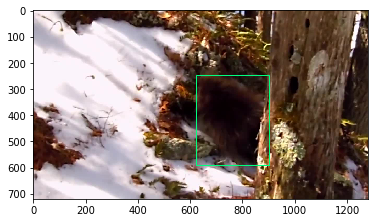

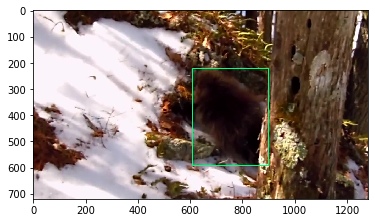

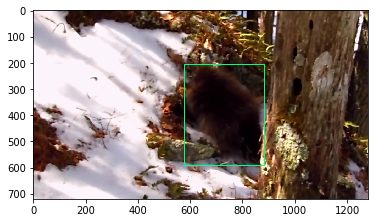

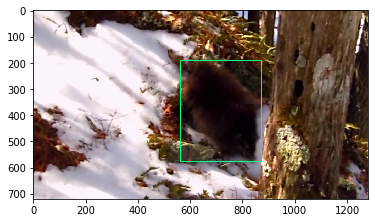

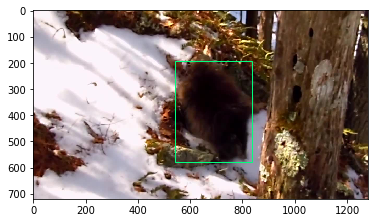

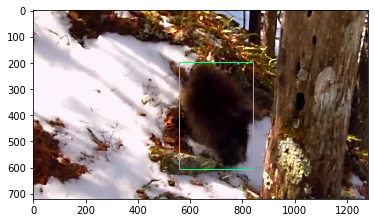

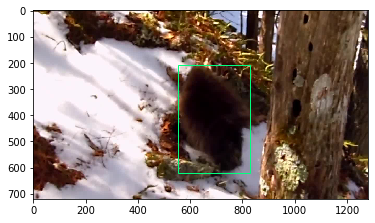

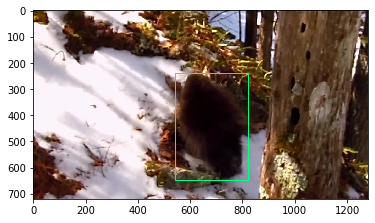

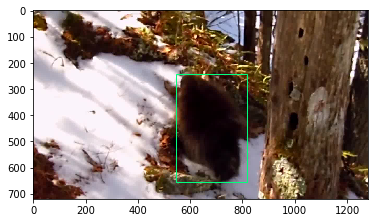

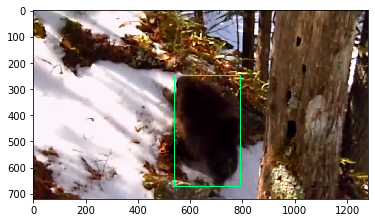

KeyboardInterrupt: 

In [37]:
for img_files, anno in dataset:
    continue

for img, gt in zip(img_files, anno):
    _, ax = plt.subplots()
    
    box = patches.Rectangle(gt[:2], *gt[2:], linewidth=1, edgecolor='springgreen', facecolor='none')
    np_img = np.asarray(Image.open(img))
    
    ax.imshow(np_img)
    ax.add_patch(box)
    plt.show()

C:\Users\Jorrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


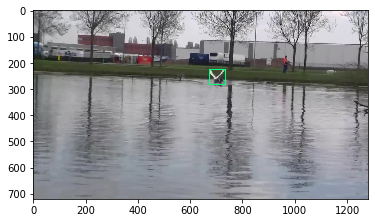

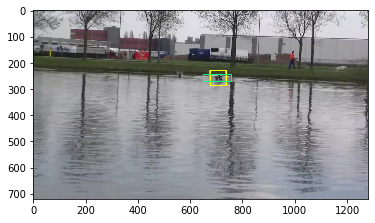

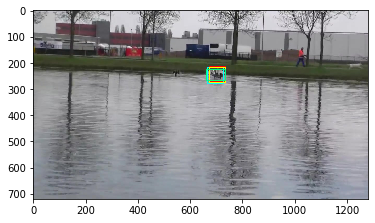

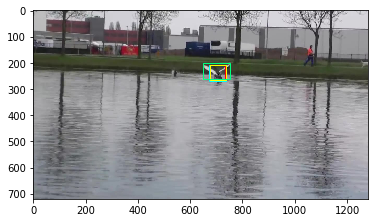

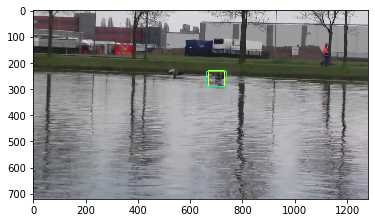

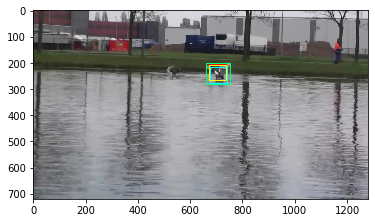

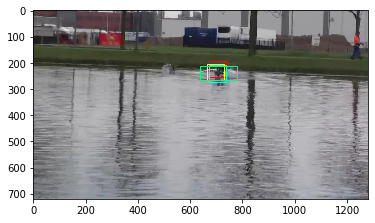

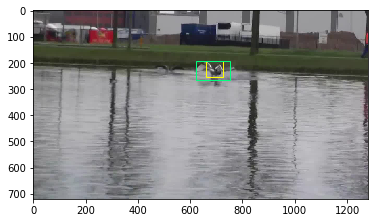

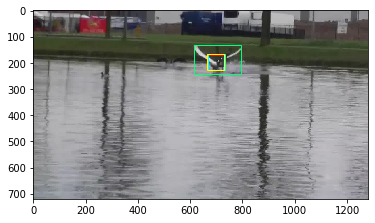

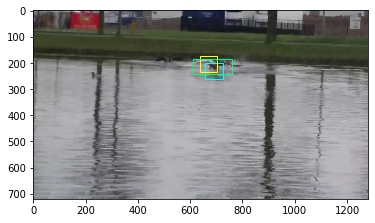

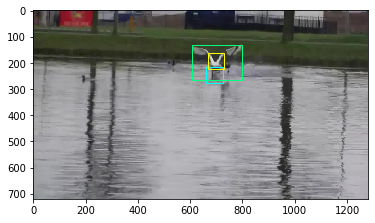

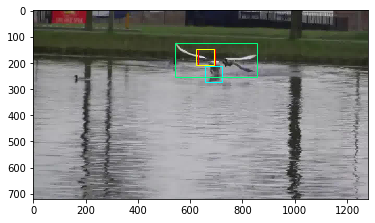

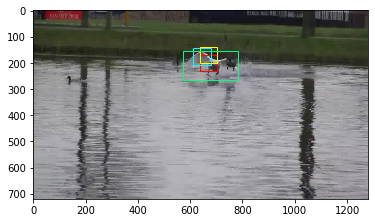

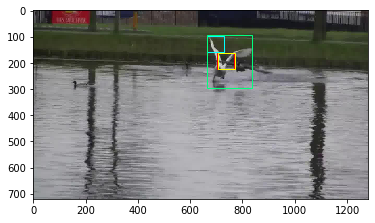

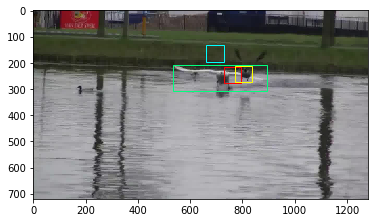

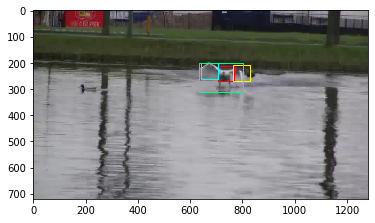

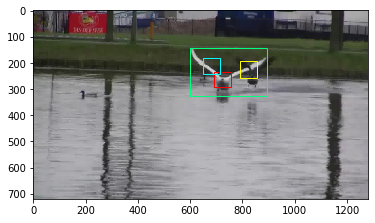

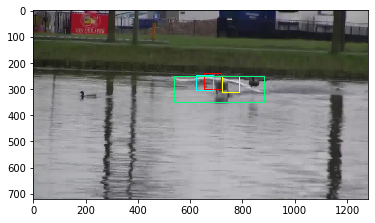

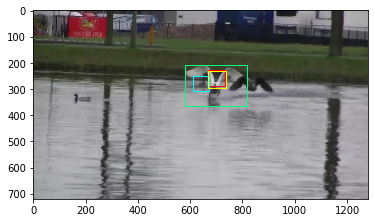

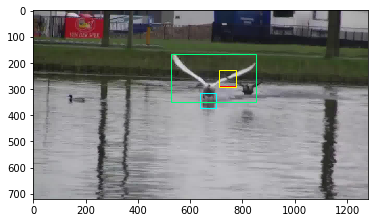

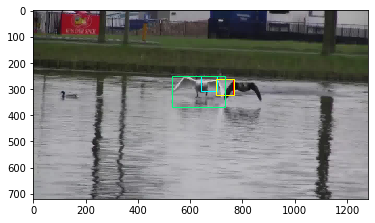

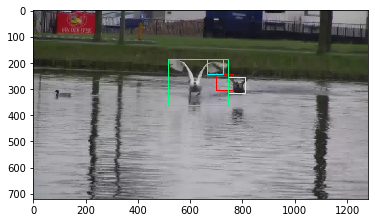

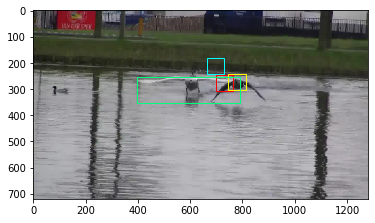

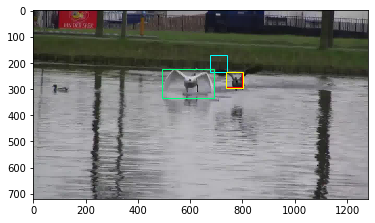

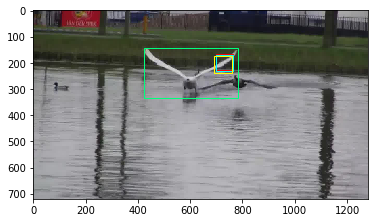

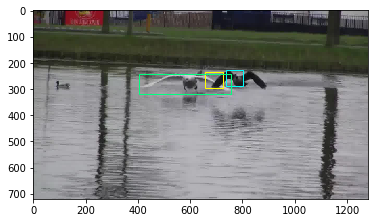

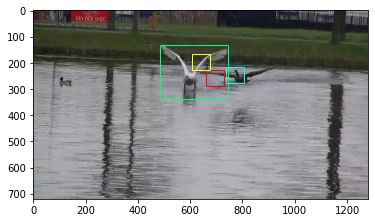

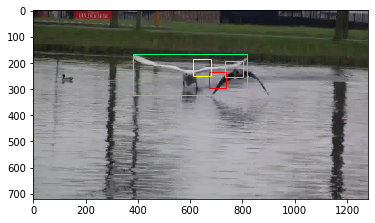

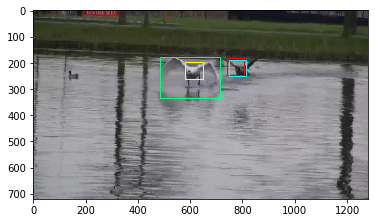

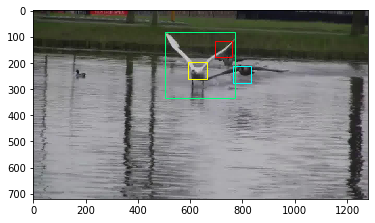

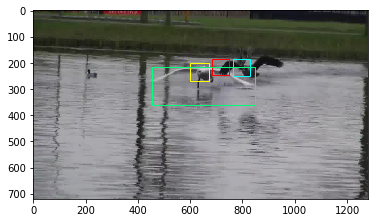

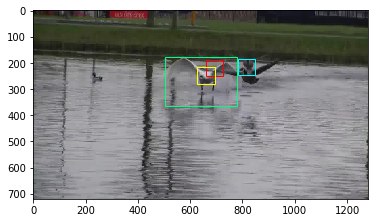

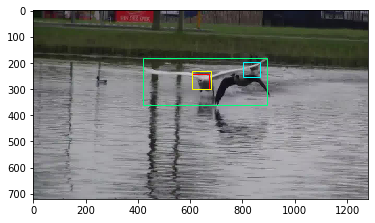

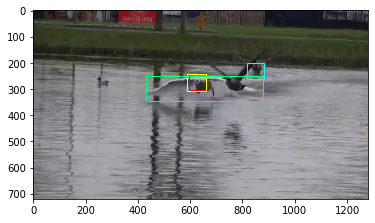

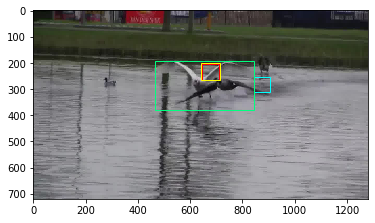

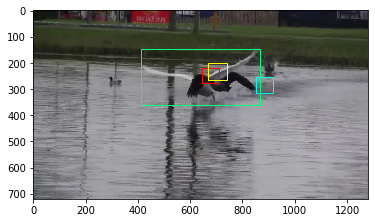

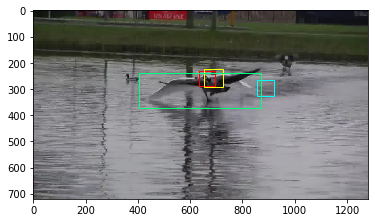

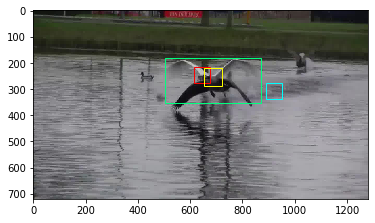

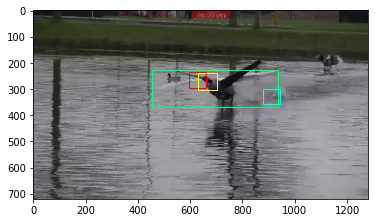

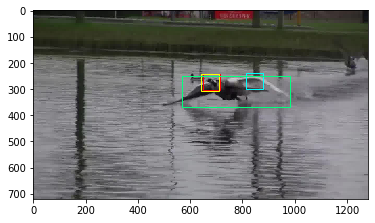

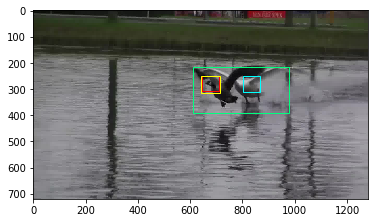

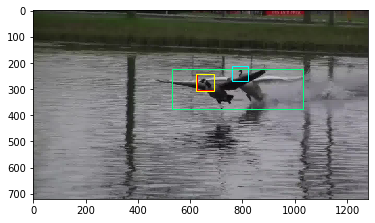

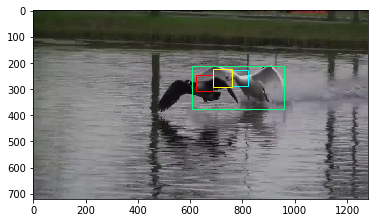

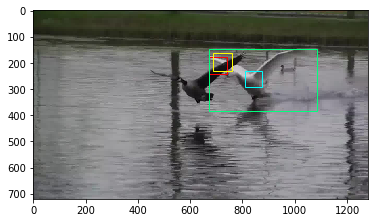

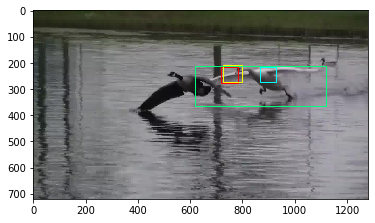

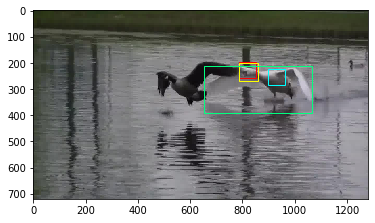

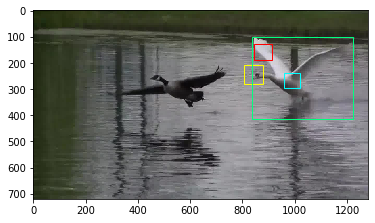

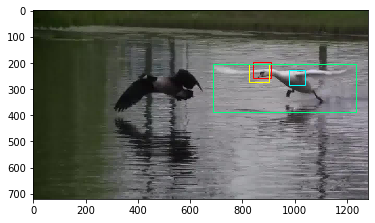

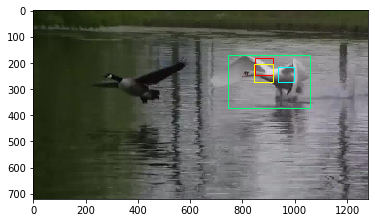

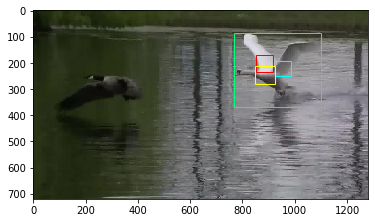

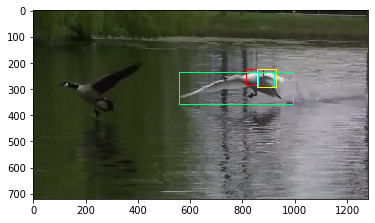

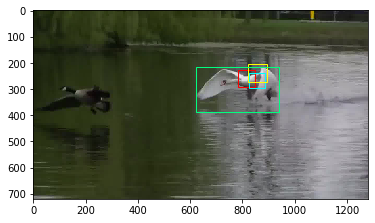

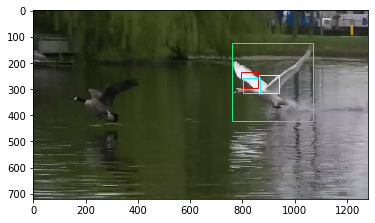

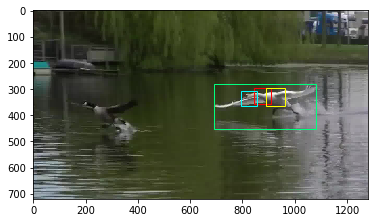

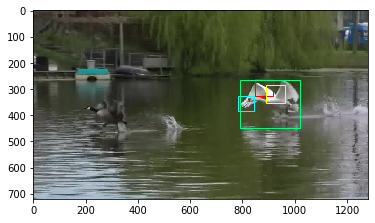

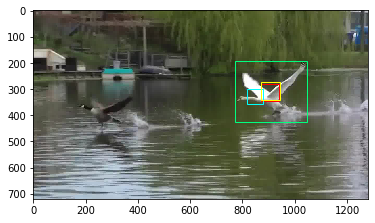

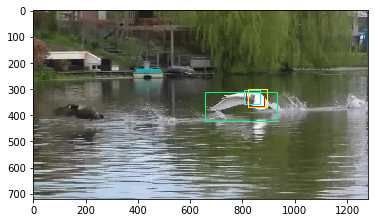

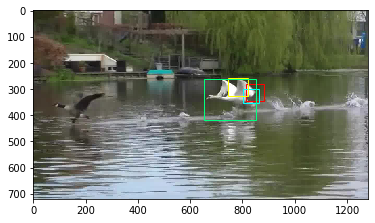

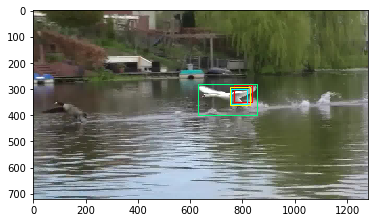

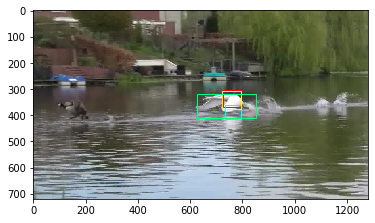

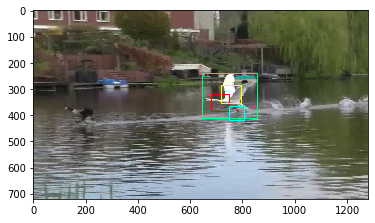

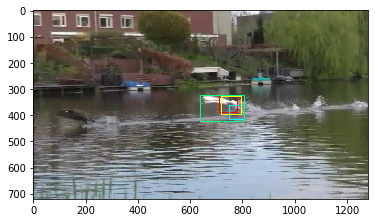

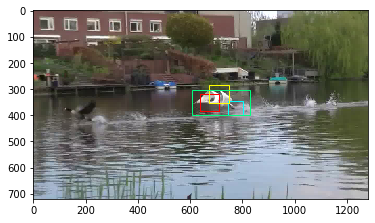

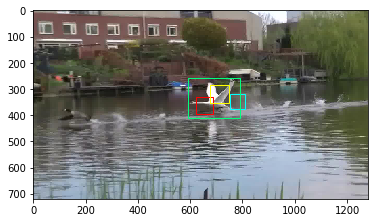

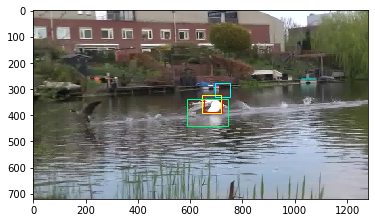

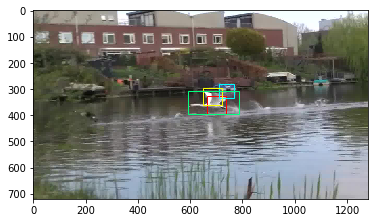

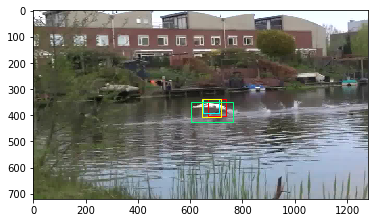

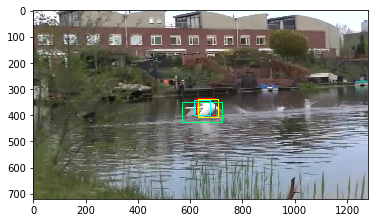

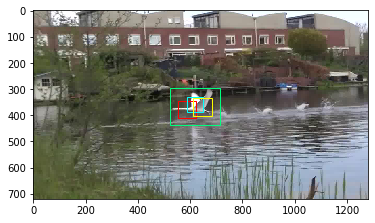

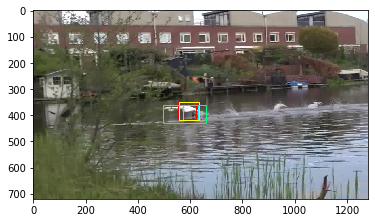

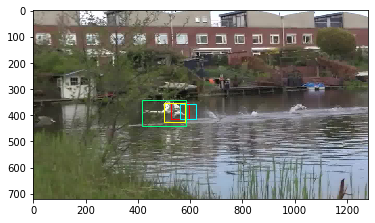

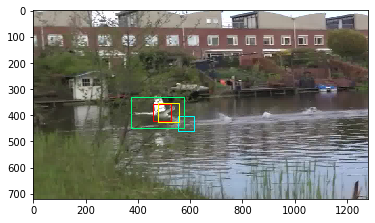

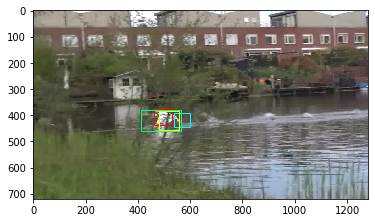

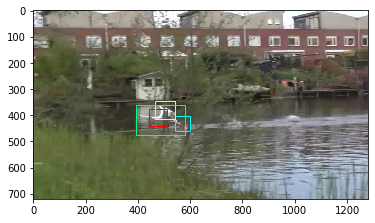

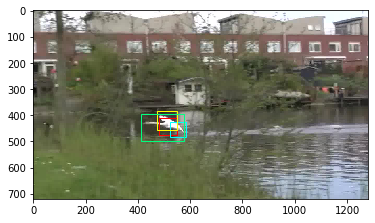

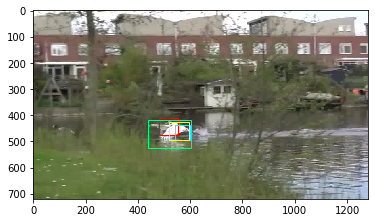

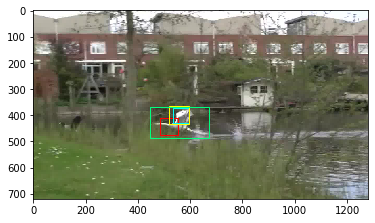

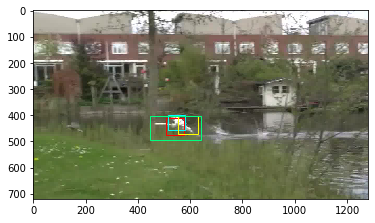

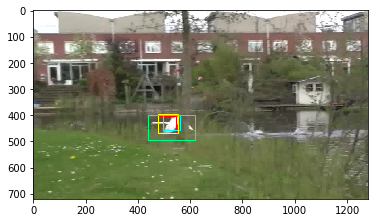

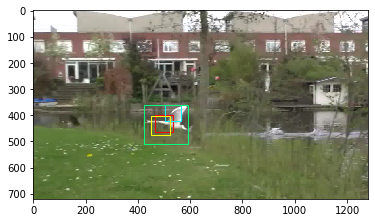

In [4]:
# Track on the sequence using both dssiam.
net_path1 = os.path.expanduser('C:/temp/dssiam_n3_f1_522_e10.pth')
net_path2 = os.path.expanduser('C:/temp/siamfc_522_e10.pth')
net_path3 = os.path.expanduser('C:/temp/dssiam_n3_f1_l3e-8_522_e30.pth')

t1 = TrackerSiamFC(backbone=DSSiam(n=1), net_path=net_path1)
t2 = TrackerSiamFC(backbone=SiamFC(), net_path=net_path2)
t3 = TrackerSiamFC(backbone=DSSiam(n=1), net_path=net_path3)

for img_files, anno in dataset:
    boxes1, _ = t1.track(img_files, anno[0, :])
    boxes2, _ = t2.track(img_files, anno[0, :])
    boxes3, _ = t3.track(img_files, anno[0, :])

for box1, box2, box3, ann, img in zip(boxes1, boxes2, boxes3, anno, img_files):
    np_img = np.asarray(Image.open(img))
    
    _, ax = plt.subplots()
    
    pred1 = patches.Rectangle(box1[:2], *box1[2:], linewidth=1, edgecolor='r', facecolor='none')
    pred2 = patches.Rectangle(box2[:2], *box2[2:], linewidth=1, edgecolor='cyan', facecolor='none')
    pred3 = patches.Rectangle(box3[:2], *box3[2:], linewidth=1, edgecolor='yellow', facecolor='none')
    gt = patches.Rectangle(ann[:2], *ann[2:], linewidth=1, edgecolor='springgreen', facecolor='none')
    
    ax.imshow(np_img)
    ax.add_patch(pred1)
    ax.add_patch(pred2)
    ax.add_patch(pred3)
    ax.add_patch(gt)